In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [64]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm

import sklearn

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5]:
# Read the data set

advertising= pd.read_csv('advertising.csv')

In [6]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
advertising.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
advertising.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [7]:
advertising.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
advertising.shape

(200, 4)

In [13]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='TV', ylabel='Sales'>

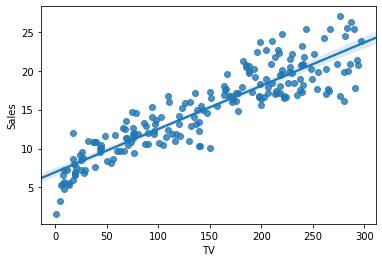

In [18]:
# visualize the data set
sns.regplot(x="TV",y="Sales",data=advertising)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

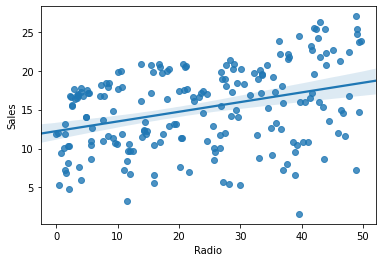

In [19]:
sns.regplot(x="Radio",y="Sales",data=advertising)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

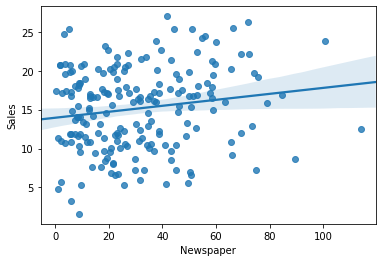

In [20]:
sns.regplot(x='Newspaper',y='Sales',data=advertising)

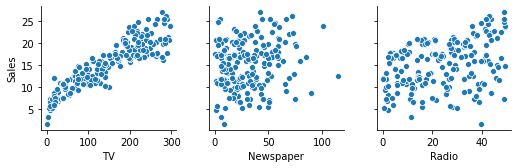

In [21]:
# we can visualize this using single function called pair plot

sns.pairplot(data=advertising,x_vars=['TV','Newspaper','Radio'],y_vars='Sales')

In [22]:
# to know correlation between variables
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

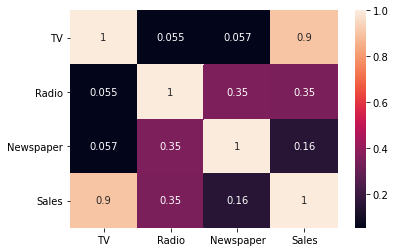

In [23]:
sns.heatmap(advertising.corr(),annot=True)

## Perfoming the simple linear regression

##### Steps:
    -Create X and Y
    -Create Train and Test sets

In [9]:
# Create X and Y

##advertising.head()

X= advertising['TV']
y=advertising['Sales']


In [12]:
# Train -Test Split

X_train,X_test, y_train, y_test =train_test_split(X,y,train_size=0.7,random_state=100)

In [14]:
X_train.shape

(140,)

In [15]:
X_test.shape

(60,)

In [16]:
y_train.shape

(140,)

In [17]:
y_test.shape

(60,)

By using Stats model we are now building this linear regression intially

By Default this stats model doesn't include constant or intecept thing of equation

In [22]:
X_train.head(2)

74    213.4
3     151.5
Name: TV, dtype: float64

In [23]:
# now we are adding that constant term to equate our equation

X_train_sm=sm.add_constant(X_train)

In [25]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [26]:
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [27]:
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [28]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 12 Feb 2021   Prob (F-statistic):           1.52e-52
Time:                        12:12:55   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

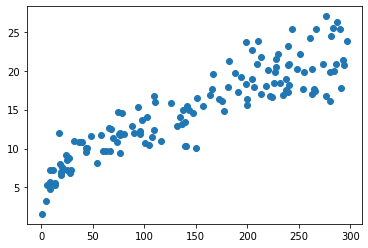

In [29]:
plt.scatter(X_train,y_train)

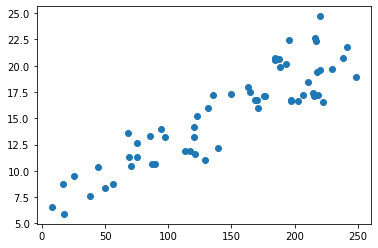

In [30]:
plt.scatter(X_test,y_test)

In [40]:
y_train_pred=lr_model.predict(X_train_sm)
y_train_pred


74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

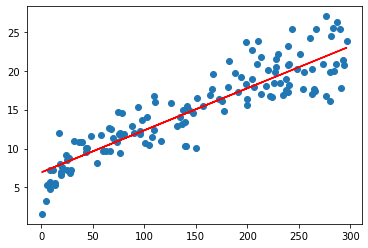

In [35]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948+0.054*X_train,'r')
plt.show()

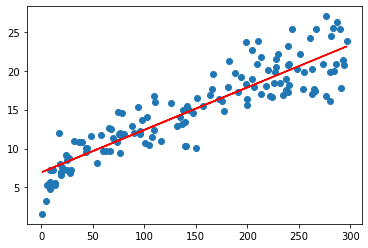

In [41]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_pred,'r')
plt.show()

## Step 3:


# Residual Analysis

In [38]:
#y_train, y_train_predict
#error= f(y_train-y_train_predict)
y_train_pred=lr_model.predict(X_train_sm)
y_train_pred


74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [42]:
res= y_train- y_train_pred

Text(0.5, 1.0, 'Residual Plot')

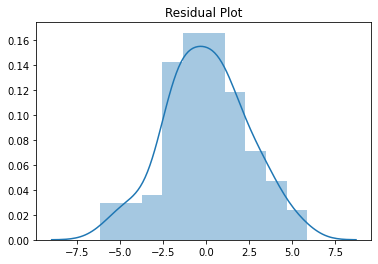

In [47]:
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

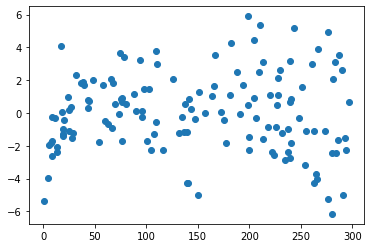

In [49]:
# the centre normal distribution mean 0
# look for patterns in residuals (We should not be able to identify )

plt.scatter(X_train,res)
plt.show()
# 

## Step 4:
Making predictions and evalution of the test


In [51]:
X_test_sm=sm.add_constant(X_test)

In [52]:
y_test_pred=lr_model.predict(X_test_sm)

In [53]:
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [56]:
# evaluate the model using r2 score

help(r2_score)

Help on function r2_score in module sklearn.metrics.regression:

r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
    R^2 (coefficient of determination) regression score function.
    
    Best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Read more in the :ref:`User Guide <r2_score>`.
    
    Parameters
    ----------
    y_true : array-like of shape = (n_samples) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape = (n_samples) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape = (n_samples), optional
        Sample weights.
    
    multioutput : string in ['raw_values', 'uniform_average', 'variance_weighted'] or None or array-like of shape (n_outputs)
    


In [57]:
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.792103160124566

For test data we got around 79 % variance of the model

In [58]:
# R2 on train set
r21=r2_score(y_true=y_train,y_pred=y_train_pred)

In [59]:
r21

0.8157933136480389

For train data we got aroung 81 % variance of the model

In [61]:
# mean_squared _rerror

mean_squared_error(y_true=y_test,y_pred=y_test_pred)

4.077556371826953

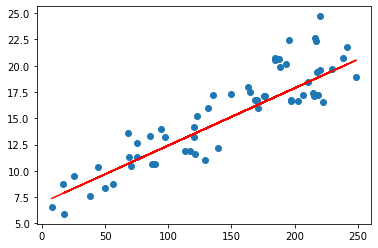

In [62]:
# lets visualize how does test data set prediction look like

plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()

# Linear Regression using Sklearn

In [63]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [65]:
lm=LinearRegression()

In [68]:
X_train_sm=X_train.values.reshape(-1,1)
X_test_sm=X_test.values.reshape(-1,1)

In [70]:
X_train_sm.shape

(140, 1)

In [71]:
lm.fit(X_train_sm,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [73]:
y_train_pred=lm.predict(X_train_sm)
y_test_pred=lm.predict(X_test_sm)

In [74]:
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8157933136480389
0.7921031601245662
